In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Loading data

In [56]:
df_orders = pd.read_parquet("../data/processed/orders_processed.parquet")
df_orders.head()

,cpf,customer_id,customer_name,delivery_address_city,delivery_address_country,delivery_address_district,delivery_address_external_id,delivery_address_latitude,delivery_address_longitude,delivery_address_state,...,merchant_id,merchant_latitude,merchant_longitude,merchant_timezone,order_created_at,order_id,order_scheduled,order_total_amount,origin_platform,order_scheduled_date
0,11271445836,ae86517015883ca081749cbc3352bab1e5b3ab8739e977...,VANESSA,RECIFE,BR,MADALENA,7974481,-34.91,-8.05,PE,...,634171fcc2289c475e8686701633c2eccccdccf6d4684c...,-34.91,-8.05,America/Recife,2019-01-31 23:59:59+00:00,fbff2657f7f1acd96f07ab9405cd89f6c3072f4b9c4407...,False,84.9,IOS,NaT
1,01075288543,d180e24c47fd1855ce52826f4afba60f882c486950db45...,CAROLINA,SAO PAULO,BR,PINHEIROS,5076233,-46.69,-23.57,SP,...,5a9af8d38b5fb82d72a780fa5d5c57b78cf0d575a0cf68...,-46.69,-23.57,America/Sao_Paulo,2019-01-31 23:59:59+00:00,5f1e9c51d56ec52560697323dc47ea3bd91016774e7cdd...,False,31.0,ANDROID,NaT
2,76699651238,1fb11ef03163611bdee2efdf21b475c1edceb9a786eda3...,MARIANNA,RIO DE JANEIRO,BR,BENFICA,7978829,-43.24,-22.89,RJ,...,cf9a2ce74bea159ccd31b684c85a4e1985b55e932e475c...,-43.24,-22.89,America/Sao_Paulo,2019-01-31 23:59:59+00:00,262579f2b5906addc7e870c33ac6b69b34ac817cdb0722...,False,44.0,DESKTOP,NaT
3,20153869125,442015dd768b756b5a444777b434d803e5996c4a202342...,ELEN,CAMPINAS,BR,JARDIM AURELIA,6823015,-47.10,-22.91,SP,...,bd0ae53e11857bf74c691d95574985a64371bff0b80ec6...,-47.10,-22.91,America/Sao_Paulo,2019-01-31 23:59:59+00:00,120563e97a54d88d2594ffc32a0900f33cc23e3d9cd394...,False,39.0,IOS,NaT
4,64714515154,5aa9c0c9b318ddfb35917248ef65efa0a2d02e007b5ba8...,KASSIANA,CURITIBA,BR,BOA VISTA,8932430,-49.25,-25.38,PR,...,76b9b57832e24ec1707d312f87eb2b4fc6dcd92b0c8a5c...,-49.25,-25.38,America/Sao_Paulo,2019-01-31 23:59:58+00:00,c984641f2bb9e4fd4114a2476d373ef416241219bf8c78...,False,25.1,ANDROID,NaT


In [5]:
df_ab_test = pd.read_parquet("../data/processed/ab_test.parquet")
df_ab_test.head()

,customer_id,is_target
0,755e1fa18f25caec5edffb188b13fd844b2af8cf5adedc...,target
1,b821aa8372b8e5b82cdc283742757df8c45eecdd72adf4...,control
2,d425d6ee4c9d4e211b71da8fc60bf6c5336b2ea9af9cc0...,control
3,6a7089eea0a5dc294fbccd4fa24d0d84a90c1cc12e829c...,target
4,dad6b7e222bab31c0332b0ccd9fa5dbd147008facd268f...,control


In [6]:
df_consumers = pd.read_parquet("../data/processed/consumers_processed.parquet")
df_consumers.head()

,customer_id,language,created_at,active,customer_name,customer_phone_area,customer_phone_number
0,c38548778a271699067c05fe75fed7b1cb7c74c999a296...,pt-br,2018-04-06 05:11:12.946000+00:00,True,ANALUCE,20,221164583
1,a0c32c941a099175dec3c0c9aae036e1d8d8901cb049f6...,pt-br,2018-04-06 05:11:12.946000+00:00,True,FABIANA,31,74385390
2,889c905b374a0c4f088444292baac6b9b0428bb3a1821b...,pt-br,2018-04-06 05:11:12.946000+00:00,True,TULASI,51,942786817
3,44895a9fcbd2d523bc1f0a06dbe5a894f39dbe0bc4e671...,pt-br,2018-04-06 05:11:12.946000+00:00,True,DANUSIA,8,866073397
4,004a0cb5ca311e07daca7da4bcd785ef528028b031d2d0...,pt-br,2018-04-06 05:11:12.946000+00:00,True,TÂNIA,6,791103647


In [7]:
df_restaurants = pd.read_parquet("../data/processed/restaurants_processed.parquet")
df_restaurants.head()

,id,created_at,enabled,price_range,average_ticket,takeout_time,delivery_time,minimum_order_value,merchant_zip_code,merchant_city,merchant_state,merchant_country
0,931da3efd65ffa8ecc6a479ff4f16ee49359e31e89958f...,2017-01-23 12:54:52.155000+00:00,False,1,30.0,0,30.0,25.0,35560,SAO PAULO,SP,BR
1,3c3126fab54a9d1a15af43fcda1fde2c49eb18d9ac0423...,2017-01-23 12:54:49.183000+00:00,False,1,30.0,0,60.0,0.0,51020,RECIFE,PE,BR
2,cc5514812859f90b6d116417ba3732edc89482b176bcfa...,2017-01-23 12:54:39.558000+00:00,False,1,30.0,0,50.0,10.0,39620,SAO PAULO,SP,BR
3,fc061ae616f83a94c53ebb548188cd7c09fc6482182a98...,2017-01-23 12:54:32.760000+00:00,False,1,30.0,0,30.0,13.0,22741,SAO PAULO,SP,BR
4,bf9d6811d3bd93f5fb1a9166658660b13c122595ab38a8...,2017-01-23 12:54:23.246000+00:00,False,4,80.0,0,45.0,20.0,88015,FLORIANOPOLIS,SC,BR



# 

# 1) Evaluation os A/B tests' KPIs


> Defina os indicadores relevantes para mensurar o sucesso da campanha e analise se ela teve impacto significativo dentro do  período avaliado. 

In [45]:
df_orders_group = df_orders.merge(df_ab_test, on='customer_id', how='inner')
df_orders_group.head()

,cpf,customer_id,customer_name,delivery_address_city,delivery_address_country,delivery_address_district,delivery_address_external_id,delivery_address_latitude,delivery_address_longitude,delivery_address_state,...,merchant_latitude,merchant_longitude,merchant_timezone,order_created_at,order_id,order_scheduled,order_total_amount,origin_platform,order_scheduled_date,is_target
0,11271445836,ae86517015883ca081749cbc3352bab1e5b3ab8739e977...,VANESSA,RECIFE,BR,MADALENA,7974481,-34.91,-8.05,PE,...,-34.91,-8.05,America/Recife,2019-01-31 23:59:59+00:00,fbff2657f7f1acd96f07ab9405cd89f6c3072f4b9c4407...,False,84.9,IOS,NaT,target
1,01075288543,d180e24c47fd1855ce52826f4afba60f882c486950db45...,CAROLINA,SAO PAULO,BR,PINHEIROS,5076233,-46.69,-23.57,SP,...,-46.69,-23.57,America/Sao_Paulo,2019-01-31 23:59:59+00:00,5f1e9c51d56ec52560697323dc47ea3bd91016774e7cdd...,False,31.0,ANDROID,NaT,target
2,76699651238,1fb11ef03163611bdee2efdf21b475c1edceb9a786eda3...,MARIANNA,RIO DE JANEIRO,BR,BENFICA,7978829,-43.24,-22.89,RJ,...,-43.24,-22.89,America/Sao_Paulo,2019-01-31 23:59:59+00:00,262579f2b5906addc7e870c33ac6b69b34ac817cdb0722...,False,44.0,DESKTOP,NaT,target
3,20153869125,442015dd768b756b5a444777b434d803e5996c4a202342...,ELEN,CAMPINAS,BR,JARDIM AURELIA,6823015,-47.10,-22.91,SP,...,-47.10,-22.91,America/Sao_Paulo,2019-01-31 23:59:59+00:00,120563e97a54d88d2594ffc32a0900f33cc23e3d9cd394...,False,39.0,IOS,NaT,target
4,64714515154,5aa9c0c9b318ddfb35917248ef65efa0a2d02e007b5ba8...,KASSIANA,CURITIBA,BR,BOA VISTA,8932430,-49.25,-25.38,PR,...,-49.25,-25.38,America/Sao_Paulo,2019-01-31 23:59:58+00:00,c984641f2bb9e4fd4114a2476d373ef416241219bf8c78...,False,25.1,ANDROID,NaT,target


### Calculating KPI's per group

**Main KPIs evaluated:**

- Retention and activation rates
- Avg order per user / Order frequency per user
- Average spend per order (ASP)
- Total Revenue
- Average spend per consumer

In [58]:
# Calculating KPIs per group

results = {}
for group in ['target', 'control']:
    qt_group_users = df_ab_test[df_ab_test["is_target"] == group]['customer_id'].nunique()
    df_group_df_orders  = df_orders_group[['order_id', 'order_created_at', 'order_total_amount', 'customer_id', 'is_target']] \
                                    .query(f'is_target == "{group}"')   
    
    #==============================
    # Users and retetion metrics
    #==============================
    # Total of users and orderrs in each groop 
    total_users = qt_group_users
    total_df_orders = df_group_df_orders["order_id"].nunique()
    
    # Active Customers - Customers that had at least 1 order
    active_users = df_group_df_orders[["order_id", "customer_id"]].groupby('customer_id').count().reset_index() # total df_orders per customer
    active_users_count = len(active_users)
    activation_rate =  round(active_users_count / total_users ,4)
    
    # Retention rate(users that done at least 2 df_orders) 
    #   Here I'm assuming that the cupom was for only 1 order. So, if the customer returned after use the coupon, we can count as a retention after user
    #   Another approach would be if they received a coupon for a period (ex.: week), we could see the weekly retention, but I do not have the campaign 
    #    configuration and rules info
    retained_users = active_users[active_users['order_id'] > 1]['customer_id'].nunique()
    retention_rate = round(retained_users / total_users, 4)


    #==============================
    # Averages per user, group
    #==============================        
    # Order frequency per users - Total df_orders / total_users
    avg_orders_per_user = round(total_df_orders / total_users, 4)
    
    # Average ticket of df_orders 
    avg_order_value = round(df_group_df_orders['order_total_amount'].mean(),4)
    

    #==============================
    # Revenues KPIs
    #==============================
    # Receita total e por usuário
    total_revenue = df_group_df_orders['order_total_amount'].sum()
    revenue_per_user = round(total_revenue / total_users, 4)
    

    #==============================
    # Saving values of the group
    #==============================
    results[group] = {
        'total_users': total_users,
        'active_users': active_users_count,
        'activation_rate': activation_rate,
        'retention_rate': retention_rate,
        'avg_orders_per_user': avg_orders_per_user,
        'avg_order_value': avg_order_value,
        'revenue_per_user': revenue_per_user,
        'total_revenue': total_revenue
    }


df_results = pd.DataFrame.from_dict(results,orient='index').reset_index()
df_results

,index,total_users,active_users,activation_rate,retention_rate,avg_orders_per_user,avg_order_value,revenue_per_user,total_revenue
0,target,445924,445924,1.0,0.5762,3.1769,47.8091,151.8868,67729986.45
1,control,360542,360542,1.0,0.4763,2.8034,47.9177,134.3317,48432203.49


### Quick insights

- Activation rate is not a reliable metric, as all users (on 'ab_test' file) had at least 1 order_id
  - This would be one one of the ways to evaluate. Does the coupon helped increase our active base? 
- There's a clear increase in retetion and avg orders per user. And consequently the increase on revenue per user and total revenue
  - Even though, the mean ticket is the pratically the same

<br></br>
### Doing statistical tests to evaluate the results

**Evaluation method**: 
- The main method of evaluation used here is the T - test (Student's T)
- T-test is a statistic model that compare the means of different groups
  - If the difference found between the groups is smaller enough (comparing to alpha) we can assume that we may have a statiscally significant  
- For this case I'm assuming a **0.05 of significance level** (as is the market standard)
- Retention is not possible to use with this method as is a binary variable not a mean 

**Hyphotesis**:
- H0: There's no significative difference between the groups 
- Ha: There's significative difference on the target group compared to control

In [60]:
# Preparing data for statistical tests
df_target_users = df_orders_group[df_orders_group['is_target'] == 'target'].groupby('customer_id')
df_control_users = df_orders_group[df_orders_group['is_target'] == 'control'].groupby('customer_id')

# KPIs per user
target_metrics = df_target_users.agg({
    'order_id': 'count',
    'order_total_amount': 'mean'
}).rename(columns={'order_id': 'qt_orders', 'order_total_amount': 'avg_value'})

control_metrics = df_control_users.agg({
    'order_id': 'count',
    'order_total_amount': 'mean'
}).rename(columns={'order_id': 'qt_orders', 'order_total_amount': 'avg_value'})

print(target_metrics.head())
print(control_metrics.head())

                                                    qt_orders   avg_value
customer_id                                                              
000021924bf8192f64a7cc17ce7c0bc511cba907308f80f...          3   57.966667
000022ced2f3aa411b66ac41167b272ae528c4acdffeebb...          2   34.325000
00006f567cb362ba98b0a23d9f9f73122e9ad98c9edb45b...          5  106.620000
0000f399c324f0463577b43bae1fd817f31e6fe768405ac...          1   38.000000
0001004b6873a53fef60d11f4d2e4435ea27bed7e5fc382...          1   30.900000
                                                    qt_orders  avg_value
customer_id                                                             
000009e29b12d8c5b9c9579e21384320c2df3bd935f19e1...          8  34.125000
000032b594523c3f8868edee4f1577b157e115cd01ab311...          1  88.800000
0000bb10fb47a1d6b2d73754ef383950ef536c77d07212e...          2  94.095000
0000c21984ae00cefb5d4931bfa49483dde546413c9b40c...         23  43.972174
00010814ab1e602ccbc9ffe3b64f44973491b2fd6d8a

In [61]:
# Applying t-test for frequency of df_orders
t_stat, p_value = stats.ttest_ind(
    target_metrics['qt_orders'].dropna(),
    control_metrics['qt_orders'].dropna(),
    equal_var=False
)

print(f"T test for order/purchase frequency: t={t_stat:.4f}, p={p_value:.4f}") 
#   Show significance as p value < significance level; a so low p-value means that the diff obsered is highly significative
#   Also, the t value high as 44 shows us that there's a high variability within the groups, 
#    indicating a signficance in the difference between them

T test for order/purchase frequency: t=44.9030, p=0.0000


In [62]:
# T test for average order value (ASP) 
t_stat, p_value = stats.ttest_ind(
    target_metrics['avg_value'].dropna(),
    control_metrics['avg_value'].dropna(),
    equal_var=False
)
print(f"Test T for the average order value: t={t_stat:.4f}, p={p_value:.4f}")

# A high p-value (> 0.05), showing that there's no indication of signficance on the diff between the groups

Test T for the average order value: t=-0.7641, p=0.4448


In [63]:
print(df_results[df_results["index"] == 'target']['revenue_per_user'])
print(df_results[df_results["index"] == 'control']['revenue_per_user'])

0    151.8868
Name: revenue_per_user, dtype: float64
1    134.3317
Name: revenue_per_user, dtype: float64


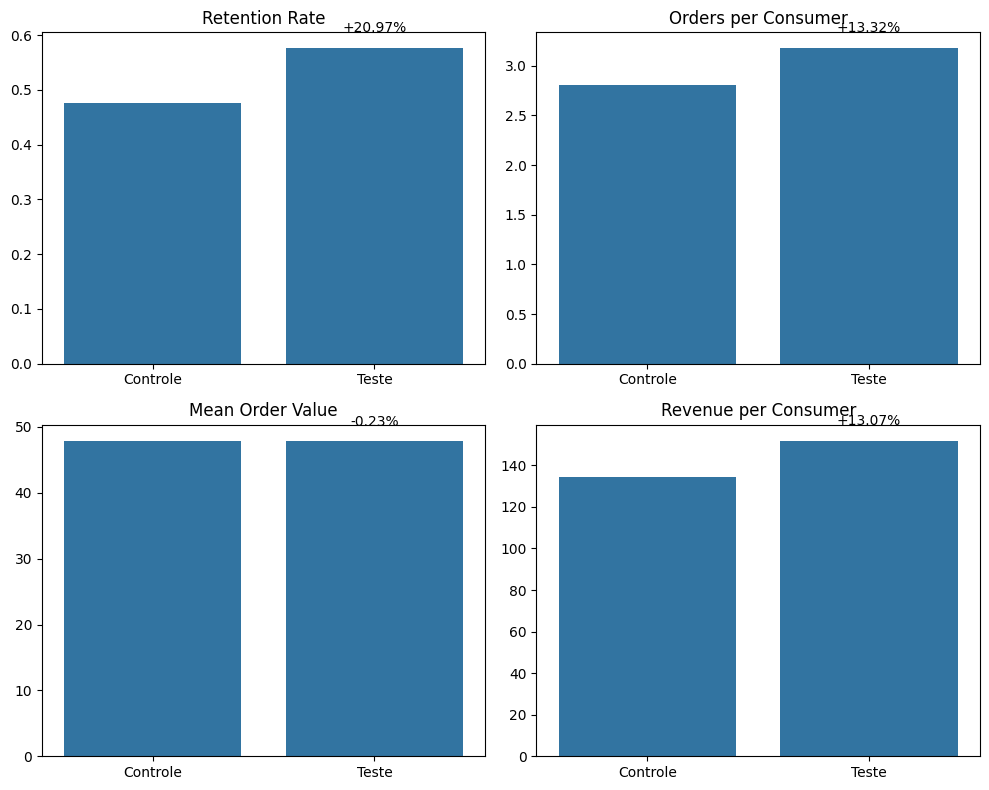

In [14]:
# Creating a plot to compare the differences between the groups 

# Creating dataframe for comparinson
df_comparison_groups = pd.DataFrame({
    'Metric': ['Retention Rate', 'df_orders per Consumer', 'Mean Order Value', 'Revenue per Consumer'],
    'Control Group': [
        results['control']['retention_rate'],
        results['control']['avg_orders_per_user'],
        results['control']['avg_order_value'],
        results['control']['revenue_per_user']
    ],
    'Test Group': [
        results['target']['retention_rate'],
        results['target']['avg_orders_per_user'],
        results['target']['avg_order_value'],
        results['target']['revenue_per_user']
    ]
})

# Calculation the % difference between the groups
df_comparison_groups['% Difference'] = ((df_comparison_groups['Test Group'] - df_comparison_groups['Control Group']) / 
                                         df_comparison_groups['Control Group'] * 100).round(2)

#==============================
# Creating plot 
#==============================
# Bar plot to visulize
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

metrics = ['Retention Rate', 'df_orders per Consumer', 'Mean Order Value', 'Revenue per Consumer']
for i, metric in enumerate(metrics):
    sns.barplot(
        x=['control', 'target'],
        y=[df_comparison_groups.loc[i, 'Control Group'], df_comparison_groups.loc[i, 'Test Group']],
        ax=axes[i]
    )
    axes[i].set_title(metric)
    axes[i].text(
        1, 
        df_comparison_groups.loc[i, 'Test Group'] * 1.05, 
        f"{df_comparison_groups.loc[i, '% Difference']:+.2f}%", 
        ha='center'
    )

plt.tight_layout()
plt.savefig('imgs/abtest_comparing_groups.png')
plt.show()

<br></br>

---

# 2) FINANCIAL VIABILITY

> Faça uma análise de viabilidade financeira dessa iniciativa como alavanca de crescimento, adotando as premisses que julgar necessárias (explicite as premisses adotadas)



## Financial evaluation:
- **ROI**
  - Calulation = `"Liquid" Revenue per user / Cost per user`
  - Liquid Revenue per user = (Incremental Revenue per user * iFood Margin (profit per order)) - Cost per User
  - Cost Per User = Average Ticket Cost * Usage Rate (how much was used)
- **Incremental profit**
  - Calc = `(Incremental Revenue * Profit Margin per Order) - Campaign Total Cost`
  - Incremental Revenue = incremental_revenue_per_user * total_impacted_users
    - Incremental Revenue per User = (Target's total revenue - Control total revenue) / Target Total Users
  - Profit Margin Per Order - How much iFood receives per order, premisse
  - Campaign total Cost - Cost per User * Total Impacted Users
- **LTV Incremental** 
  - Calc = Daily Incremental * Consumer Lifecycle * Order profit Margin
  - Daily incremental = Incremental Revenue per User / Campaign Period in Days
- **Payback Time** 
  - Calc = Campaign total Cost / Incremental Daily Profit
  - Incremental Daily Profit = Incremental Profit / Campaign Period in Days


### Premisses 
In order to make these evaluation, some premissess where necessary to be done. As I do not have access to these informations, I assume some values based on my professional experience and some educated guesses

In [29]:
# Defining premisses
premisses = {
    'average_coupon_cost': 8, # Avg value of discount per coupon (Clube ifood goes up to R$10, so, I assumed 8 as average on this experiment)
    'cupom_adoption_rate': 0.65,  # % of users that used the receivend coupon (necessary due to both ab_test and df_orders datasets have the same amount of users, so, I cant calculate), assuming by experience
    'order_profit_margin': 0.25,  # Avg of contribution margin per order; how much iFood gets from each order
    'operational_costs': 0.05,  # % of revenue spend with adicional operational costs
    'campaign_period': 30,  # Period of campaing, as seem in orders dataset
    'customer_lifetime': 365  # Avg time that the customer is active, in days
}

In [30]:
# ROI and INCREMENTALITY PROFIT

# Getting data by group
control = results['control']
target = results['target']


# Calculating incremental revenue per user
incremental_revenue_per_user = (target['total_revenue'] - control['total_revenue']) / target["total_users"]


# Calc user's cost
cost_per_user = premisses['average_coupon_cost'] * premisses['cupom_adoption_rate']


# Calculating the "liquid" ROI or "Direct ROI" of the test (only considering direct costs)
roi_liquid = (incremental_revenue_per_user * premisses['order_profit_margin'] - cost_per_user) / cost_per_user


#===================
# Calculating KPIs
#===================
total_impacted_users = target['total_users']
incremental_revenue = incremental_revenue_per_user * total_impacted_users
campaign_total_cost = cost_per_user * total_impacted_users
incremental_profit = incremental_revenue * premisses['order_profit_margin'] - campaign_total_cost
roi_campaign = incremental_profit / campaign_total_cost if campaign_total_cost > 0 else 0


print(f"ROI Liquid: {roi_liquid:.2%}")
print(f"Incremental Profit: R$ {incremental_profit:.2f}")

ROI Liquid: 108.06%
Incremental Profit: R$ 2505640.94


In [42]:
# CALCULATE INCREMENTAL LTV - How much during a customer lifecycle we have of incrementality? 

# Calc Incremental LTV (Adicional Value per user in during time) 
daily_incremental = incremental_revenue_per_user / premisses['campaign_period']
ltv_incremental = daily_incremental * premisses['customer_lifetime'] * premisses['order_profit_margin']


print(f"Incremental LTV per user: R$ {ltv_incremental:.2f}")

Incremental LTV per user: R$ 131.63


In [55]:
# Payback Time
incremental_daily_profit = incremental_profit / premisses['campaign_period']
payback_time = campaign_total_cost / incremental_daily_profit

# Exibir resultados
print(f"Incremental Daily Profit: R$ {incremental_daily_profit:.2f}")
print(f"Payback Time: {payback_time:.2f} days")

Incremental Daily Profit: R$ 83521.36
Payback Time: 27.76 days


### Some conclusions

- This campaign brings a ROI of 1.08, which is positive but can surely improve 
- With this we were able to have R$ 2,505,640.94 of incremental gross profit
- An Incremental LTV of R$131.63 per user
- And from the users that participated in the campaing we had a 27.7 days for payback time

These numbers shows us that this incentive has a promissing future, but we can improve it to have a better result

<br></br>

--- 

# 3) IMPROVEMENTS AND NEW TEST RECOMMENDATION

> Recomende oportunidades de melhoria nessa ação e desenhe uma nova proposta de teste A/B para validar essas hipóteses. 

### **Current Campaign Summary**

Some insights regarding the test ran:

- **Strong frequency impact:** The campaign significantly increased order frequency (t=44.9030, p=0.0000)

- **No significant AOV impact:** Average order value showed no statistically significant change (t=-0.7641, p=0.4448); this means that, even that we increased the frequency, the `Average Order Value` has not

- **Improved retention:** Retention rate increased from 47% (control) to 57% (target)

- **Increased revenue per user:** From R$134 (control) to R$151 (target), a 12.7% improvement

- **Positive but modest ROI:** ROI of 1.08 with R$2,505,640.94 incremental gross profit

- **Reasonable payback period:** 27.7 days to recoup investment

- **Substantial incremental LTV:** R$131.63 per user




<br></br>
## New A/B Test Proposal: Multi-Arm Segmented Incentive Test

**Test Objective**

Determine which incentive structure maximizes ROI and incremental LTV.

**Hypothesis**

A segmented approach with different incentives structures, tailored to user behavior patterns may increase campaign ROI by at least 40% compared to the current flat, unique incentive structure, while reducing payback period to under 20 days.

### **Test Design**
First of all, calculate minimum required, as its a multi variant test we can use something like "ANOVA" method, and F effect size to calculate this minimum necessary.

**Test Groups**
All the values of % bellow are considering that they are random to guarantee no bias. Also that the sample size is big enough that the 10% in control is also enough for us to get a statistical significant

- **Control Group:** No incentives (10% of eligible users)

- **Baseline Group:** Current flat incentive structure (45% of eligible users)

- **Hybrid Segment-Based Group:** Different incentive structures based on user segments (45% of eligible users)
  - Why: The modest ROI of 1.08 suggests not all users responded equally to incentives, so we can segmentate them to offer them the best value for money coupon 
  - High-frequency users: AOV-focused incentives
  - Low-frequency users: Frequency-focused incentives
  - High-value users: Retention-focused incentives


### Key Metrics to Measure

**1) Primary Metrics:**
- ROI (target: > 1.5)
- Payback period (target: <20 days)
- Incremental LTV (target: >R$175)

**2) Secondary Metrics:**
- Order frequency
- Average order value
- Retention rate at 30, 60, and 90 days
- Category exploration (% of orders from new categories) 
- Revenue per user


### Test Duration

- **Active incentive period:** 6 weeks
- **Measurement period:** 12 weeks (to capture longer-term effects)

### Expected Outcomes

Based on current results and the proposed improvements:

- Increase ROI from 1.08 to 1.5 or more
- Reduction in payback period from 27.7 days to under 20 days
- Increase in incremental LTV from R$131.63 to R$175+
- Identification of optimal incentive structures for different user segments